**Unsupervised Learning**

# K Means

## Goal
Cluster a data set into $k$ different clusters  The data set is unlabeled (unsupervised learning).

Each sample is assigned to the cluster with the nearest mean. 

## Iterative Operation
1. Initialize cluster centers (e.g. Randomly)
2. Repeat until converged:
   - Update cluster labels: Assign points tot eh nearest cluster center (centeroid). 
   - Update cluster centers: Set center of the mean of each cluster. 

## Euclidean Distance
Get the distance between two feature vectors.

$ d(p,q) = \sqrt{\sum (p_i - q_i)^2} $

## Notebook Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Test
from sklearn.datasets import make_blobs

## Keeping Consistency

In [10]:
np.random.seed(42)

## Euclidean Distance Function

In [3]:
def euclidean_distance(x1,x2):
    return np.sqrt(np.sum(x1-x2)**2)

## K-Means Implementation

**Note:** `plot_steps` is optional, and is needed to plot the different steps.

In [6]:
class KMeans:
    def __init__(self, K=5, max_iter=100, plot_steps=False, plot_final=True):
        self.K = K
        self.max_iter = max_iter
        self.plot_steps = plot_steps
        self.plot_final = plot_final
        
        # List of sample indicies for each clusters
        self.clusters = [[] for _ in range(self.K)]
        # Mean feature vector for each clusters
        self.centroids = []
    
    def predict(self, X):
        self.X = X
        self.n_samples, self.n_features = X.shape
        
        # Initialize centeroids
        random_sample_idxs = np.random.choice(self.n_samples, self.K, replace=False)
        self.centroids = [self.X[idx] for idx in random_sample_idxs]
        
        # Optimization
        for _ in range(self.max_iter):
            # Update Clusters
            self.clusters = self._create_clusters(self.centroids)
            
            if self.plot_steps:
                self.plot()
            # Update Centeroids
            centroids_old = self.centroids
            self.centroids = self._get_centroids(self.clusters)
            
            if self.plot_steps:
                self.plot()
            # Check for Convergence (if Converged)
            if self._is_converged(centroids_old, self.centroids):
                if self.plot_final:
                    self.plot()
                break
        
        # Return cluster labels
        return self._get_cluster_labels(self.clusters)
    
    def _create_clusters(self, centroids):
        clusters = [[] for _ in range(self.K)]
        for idx, sample in enumerate(self.X):
            centroid_idx = self._closest_centroid(sample, centroids)
            clusters[centroid_idx].append(idx)
        return clusters
    
    def _closest_centroid(self, sample, centroids):
        distances = [euclidean_distance(sample, point) for point in centroids]
        closest_idx = np.argmin(distances)
        return closest_idx
    
    def _get_centroids(self, clusters):
        centroids = np.zeros((self.K, self.n_features))
        for cluster_idx, cluster in enumerate(clusters):
            cluster_mean = np.mean(self.X[cluster], axis=0)
            centroids[cluster_idx] = cluster_mean
        return centroids
    
    def _is_converged(self, centroids_old, centroids):
        distances = [euclidean_distance(centroids_old[i], centroids[i]) for i in range(self.K)]
        return sum(distances) == 0
    
    def _get_cluster_labels(self, clusters):
        labels = np.empty(self.n_samples)
        for cluster_idx, cluster in enumerate(clusters):
            for sample_idx in cluster:
                labels[sample_idx] = cluster_idx
        return labels
    
    def plot(self):
        fig, ax = plt.subplots(figsize=(12,8))
        
        for i, index in enumerate(self.clusters):
            point = self.X[index].T
            ax.scatter(*point)
            
        for point in self.centroids:
            ax.scatter(*point, marker='x', color='black', linewidth=2)
            
        plt.show()
        

## Testing

### Initial Data and Initialized Clusters

(500, 2)
4


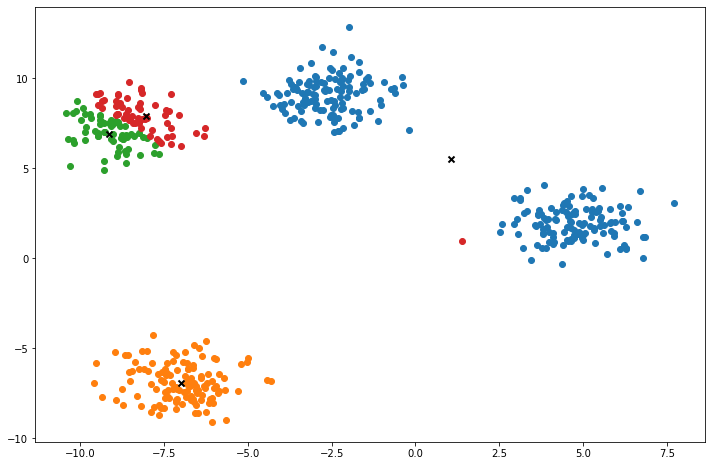

In [11]:
X, y = make_blobs(centers = 4, n_samples = 500, n_features=2, shuffle=True, random_state=42)
print(X.shape)

clusters=len(np.unique(y))
print(clusters)

k = KMeans(K=clusters, max_iter=150, plot_steps=False, plot_final=False)
y_pred = k.predict(X)

k.plot()

## After Optimizing (Clustering)

(500, 2)
4


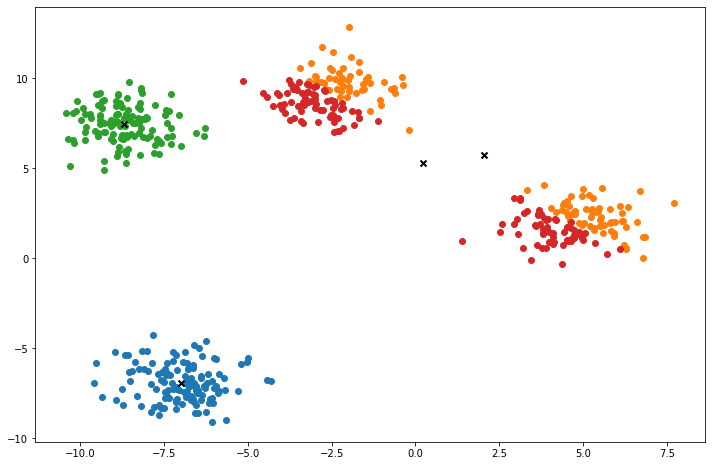

In [12]:
X, y = make_blobs(centers = 4, n_samples = 500, n_features=2, shuffle=True, random_state=42)
print(X.shape)

clusters=len(np.unique(y))
print(clusters)

k = KMeans(K=4, max_iter=150, plot_steps=False)
y_pred = k.predict(X)